<a href="https://colab.research.google.com/github/SilvioCesarTeixeira/PJI4/blob/master/PIJ4ETL_SRAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar e Importar Bibliotecas

In [1]:
!pip install openpyxl
!pip install pyexcel
!pip install sweetviz
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 KB 2.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 18.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
#from google.colab import files
import io
import openpyxl
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt

Se for carregar arquivo do computador, deve retirar o caracter # da frente da linha de código logo abaixo e escolher os arquivos  

In [ ]:
#uploaded = files.upload()

Definir caminho para os arquivos de dados

In [22]:
url_SRAG = r'https://github.com/SilvioCesarTeixeira/PJI4/raw/master/A164522189_40_88_59.xlsx'
url_QA = r'https://github.com/SilvioCesarTeixeira/PJI4/raw/master/QA_ITP_SMP.xlsx'

Criar Dataframes

In [29]:
df1 = pd.read_excel(url_QA, engine='openpyxl')
df2 = pd.read_excel(url_SRAG, engine='openpyxl')
df2

,Fonte TABNET – Secretaria Municipal da Saúde da Prefeitura de São Paulo -sp,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,COVID19 S?ndrome Respirat?ria Aguda Grave (SRAG),NaN,NaN,NaN
1,N? de Casos por Ano M?s Dia Notifica??o e Subp...,NaN,NaN,NaN
2,Subprefeitura (Res): ITAIM PAULISTA,SAO MIGUEL,NaN,NaN
3,Interna??o: Sim,NaN,NaN,NaN
4,Per?odo:2020-2023,NaN,NaN,NaN
...,...,...,...,...
1037,01/03/2023,-,2,2
1038,Total,8331,8555,16886
1039,Fonte: SIVEP GRIPE/DVE/COVISA/SMS-SP. Data de ...,sujeitos a altera??o.,NaN,NaN
1040,Nota:,NaN,NaN,NaN


Definir a linha zero do dataframe 1 como título das colunas

In [30]:
df1
df1.columns = df1.iloc[0]
df1 = df1.reindex(df1.index.drop(0))
df1

,date,pm25,pm10,o3,no2,so2,co
1,2023/3/2,44,19,41,8,,
2,2023/3/3,54,24,45,9,,
3,2023/3/4,52,22,29,10,,
4,2023/3/5,49,20,10,10,,
5,2023/2/5,56,,29,6,,
...,...,...,...,...,...,...,...
3052,2014/4/1,,,27,,,
3053,2018/9/19,,,,12,1,6
3054,2019/6/10,,,,,1,5
3055,2018/9/17,,,,,,3


Definindo a primeira coluna como data com padrão Português do Brasil

In [31]:
df1['Data'] = pd.to_datetime(df1['date'], format='%Y/%m/%d').dt.strftime('%d/%m/%Y')
col_Data_correta = df1.iloc[:, -1]
df1 = df1.iloc[:, 1:-1]
df1.insert(loc=0, column='Data', value=col_Data_correta)
df1

,Data,pm25,pm10,o3,no2,so2,co
1,02/03/2023,44,19,41,8,,
2,03/03/2023,54,24,45,9,,
3,04/03/2023,52,22,29,10,,
4,05/03/2023,49,20,10,10,,
5,05/02/2023,56,,29,6,,
...,...,...,...,...,...,...,...
3052,01/04/2014,,,27,,,
3053,19/09/2018,,,,12,1,6
3054,10/06/2019,,,,,1,5
3055,17/09/2018,,,,,,3


In [32]:
df2.columns = df2.iloc[5]
linhas_remover = list(range(0,6)) + list(range(1038,1042))
df2 = df2.reindex(df2.index.drop(linhas_remover))
df2 = df2.rename(columns={'Ano M?s Dia Notifica??o': 'Data'})
df2

5,Data,ITAIM PAULISTA,SAO MIGUEL,Total
6,31/01/2020,-,1,1
7,13/02/2020,1,-,1
8,19/02/2020,1,-,1
9,22/02/2020,1,-,1
10,24/02/2020,1,1,2
...,...,...,...,...
1033,24/02/2023,2,1,3
1034,25/02/2023,1,1,2
1035,26/02/2023,-,1,1
1036,27/02/2023,-,1,1


Juntar os dois dataframes, mas mantendo apenas as datas que coincidem

In [33]:
df_base = pd.merge(df1, df2, how='inner', on='Data')

Definir uma data de corte

In [34]:
data_limite = '01/01/2020'
#df_base['Data'] = pd.to_datetime(df_base['Data'], format='%d/%m/%Y')
df_base = df_base.loc[df_base['Data'] > data_limite]

Analisar o conteúdo e os tipos de dados do dataframe base

In [35]:
df_base.describe()

,Data,pm25,pm10,o3,no2,so2,co,ITAIM PAULISTA,SAO MIGUEL,Total
count,964,964,964,964,964,964,964,964,964,964
unique,964,113,70,61,28,1,1,41,41,67
top,06/02/2023,,15,22,7,,,1,1,1
freq,1,73,51,47,98,964,964,118,97,74


In [36]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 963
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Data            964 non-null    object
 1    pm25           964 non-null    object
 2    pm10           964 non-null    object
 3    o3             964 non-null    object
 4    no2            964 non-null    object
 5    so2            964 non-null    object
 6    co             964 non-null    object
 7   ITAIM PAULISTA  964 non-null    object
 8   SAO MIGUEL      964 non-null    object
 9   Total           964 non-null    object
dtypes: object(10)
memory usage: 82.8+ KB


Renomear colunas com titulo extenso e converter strings em tipos numericos

In [37]:
df_base = df_base.rename(columns={'ITAIM PAULISTA': 'IT_SG', 'SAO MIGUEL': 'SM_SG', 'Total':'Total_SG'})
df_base[' pm25'] = pd.to_numeric(df_base[' pm25'], errors='coerce')
df_base[' pm10'] = pd.to_numeric(df_base[' pm10'], errors='coerce')
df_base[' o3'] = pd.to_numeric(df_base[' o3'], errors='coerce')
df_base[' no2'] = pd.to_numeric(df_base[' no2'], errors='coerce')
df_base['IT_SG'] = pd.to_numeric(df_base['IT_SG'], errors='coerce')
df_base['SM_SG'] = pd.to_numeric(df_base['SM_SG'], errors='coerce')

In [38]:
df_base.describe()

,pm25,pm10,o3,no2,IT_SG,SM_SG
count,891.000000,942.000000,935.000000,919.000000,896.000000,909.000000
mean,51.692480,24.627389,26.700535,8.590860,8.931920,9.027503
std,24.524643,13.741898,10.049457,4.827093,7.826673,7.642790
min,9.000000,3.000000,4.000000,1.000000,1.000000,1.000000
25%,33.000000,15.000000,20.000000,5.000000,3.000000,3.000000
50%,47.000000,21.000000,25.000000,8.000000,7.000000,7.000000
75%,67.000000,32.000000,32.000000,12.000000,13.000000,12.000000
max,138.000000,88.000000,73.000000,30.000000,47.000000,49.000000


In [39]:
df_base.tail()

,Data,pm25,pm10,o3,no2,so2,co,IT_SG,SM_SG,Total_SG
959,16/04/2020,NaN,30.0,32.0,9.0,,,12.0,28.0,40
960,22/03/2020,NaN,9.0,21.0,NaN,,,7.0,3.0,10
961,03/02/2022,NaN,NaN,12.0,6.0,,,5.0,8.0,13
962,04/02/2022,NaN,NaN,26.0,11.0,,,7.0,9.0,16
963,05/02/2022,NaN,NaN,19.0,8.0,,,2.0,8.0,10


Utilizar o sweetviz para gerar um relatório com as estatísticas dos dados

In [41]:
relatorio = sv.analyze(df_base, pairwise_analysis='off')
relatorio.show_html('RelatorioSRAG.html')

                                             |          | [  0%]   00:00 -> (? left)

Report RelatorioSRAG.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Preencher os valores NaN (não numéricos) com a média de cada variável

In [42]:
df_base[' pm25'].fillna(value=df_base[' pm25'].mean(), inplace=True)
df_base[' pm10'].fillna(value=df_base[' pm10'].mean(), inplace=True)
df_base[' o3'].fillna(value=df_base[' o3'].mean(), inplace=True)
df_base[' no2'].fillna(value=df_base[' no2'].mean(), inplace=True)
df_base['IT_SG'].fillna(value=df_base['IT_SG'].mean(), inplace=True)
df_base['SM_SG'].fillna(value=df_base['SM_SG'].mean(), inplace=True)
df_base['Total_SG'].fillna(value=df_base['Total_SG'].mean(), inplace=True)

Gerar uma matriz de correlação entre as variáveis do dataframe base

In [43]:
corr_matriz1 = df_base.corr()

Plotar o Mapa de Calor com as correlações calculadas

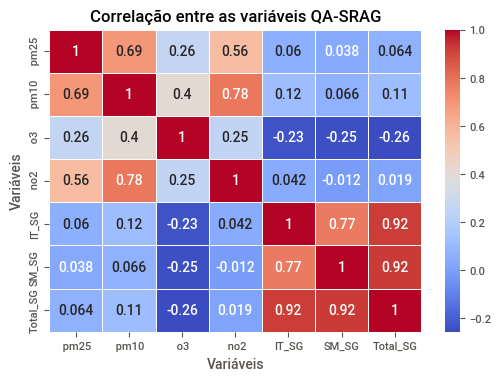

In [45]:
sns.heatmap(corr_matriz1, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlação entre as variáveis QA-SRAG')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')
plt.show()

Crias uma série temporal de dados do dataframe

In [46]:
df_base['Data'] = pd.to_datetime(df_base['Data'], format='%d/%m/%Y')

In [47]:
df_base.dtypes

Data        datetime64[ns]
 pm25              float64
 pm10              float64
 o3                float64
 no2               float64
 so2                object
 co                 object
IT_SG              float64
SM_SG              float64
Total_SG             int64
dtype: object

In [48]:
df_base_mmAAAA = df_base.groupby([df_base['Data'].dt.year, df_base['Data'].dt.month])['Total_SG'].sum()

In [49]:
df_base_mmAAAA

Data  Data
2020  1          1
      2          5
      3        234
      4       1042
      5       1236
      6       1067
      7       1049
      8        796
      9        563
      10       416
      11       500
      12       649
2021  1        653
      2        586
      3       1428
      4        999
      5        898
      6        744
      7        458
      8        320
      9        279
      10       191
      11       142
      12       372
2022  1        213
      2        237
      3        282
      4        136
      5         99
      6         61
      7        134
      8         84
      9         53
      10        46
      11       100
      12        70
2023  1         38
      2         26
      3          2
Name: Total_SG, dtype: int64

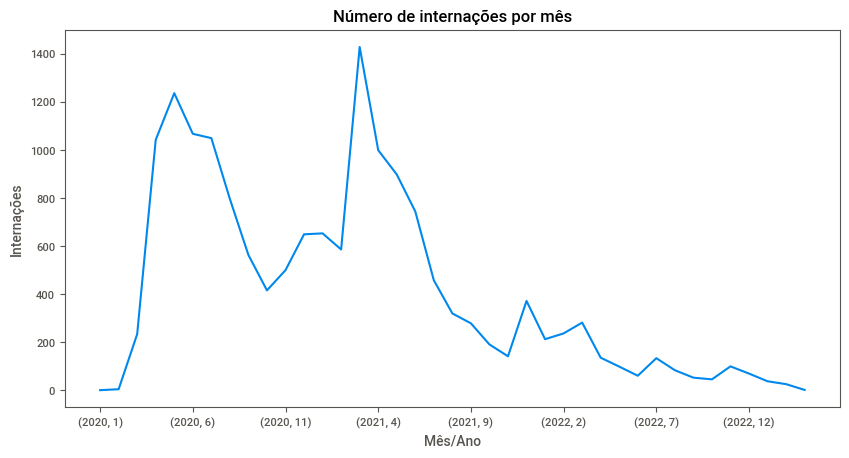

In [50]:
df_base_mmAAAA.plot(kind='line', figsize=(10, 5))
plt.title('Número de internações por mês')
plt.xlabel('Mês/Ano')
plt.ylabel('Internações')
plt.show()